# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Load the diabetes dataset
X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

In [3]:
# use subset of data
N = 100
X = X[:,2]
X = X[:N]
y = y[:N]

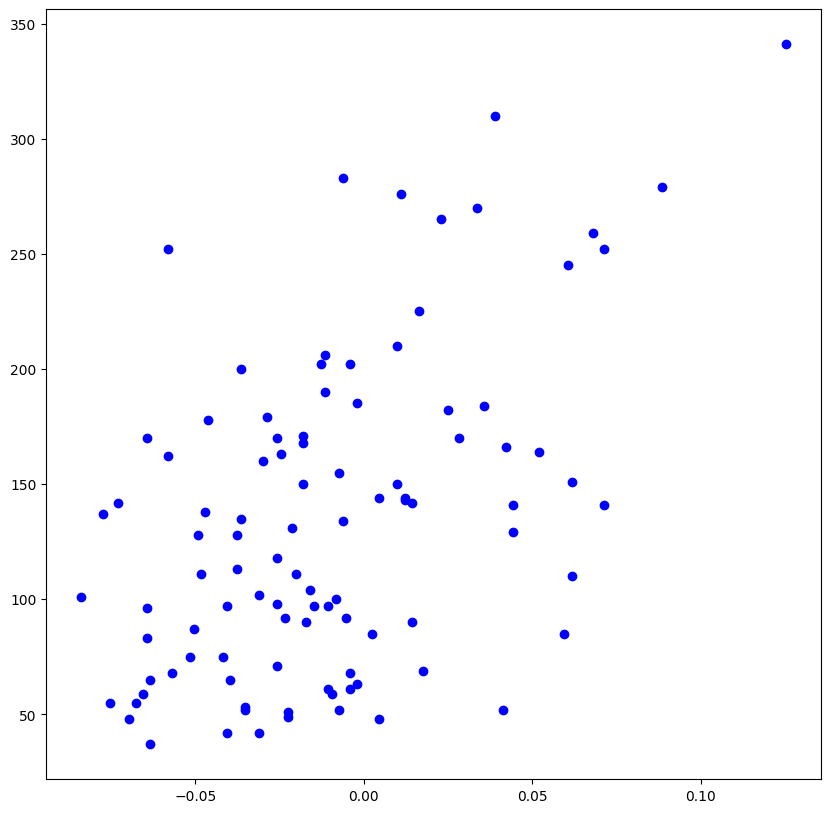

In [4]:
def plot_lin(x,y,predictions=None):
    """
    """
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    
    ax.plot(x,y,'ob')
    if isinstance(predictions, np.ndarray):
        ax.plot(x,predictions,'or')
        
    plt.show()

plot_lin(X,y,None)

In [6]:
class LinReg():
    """ Toy linear regression class to estimate the intecept of b
    """
    # constructor
    def __init__(self,m,b,x,y):
        #-----------
        # y = m*X+b
        #----------
        # y dependent variable
        # m slope
        # b intercept
        # X independent variable
        self.m = m
        self.b = b
        self.x = x
        self.y = y
    
    def update_b(self, b):
        """ Set intecept value
        """
        self.b = b
    
    def predict(self):
        """ Get predictions based on current model parameters m, b
        """
        return self.b + self.m * self.x 
        
    def mse(self,b):
        """ Compute the mse
            at intercept b
        """
        return mean_squared_error(self.y, b+self.m*self.x)

        
    def intercept_mse_derivative(self, b):
        """ Compute the derivative of the loss fuction (mse)
            at intercept b
        """
        return sum(-2*(self.y-(b+self.m*self.x)))
    



linreg = LinReg(100,0,X,y)

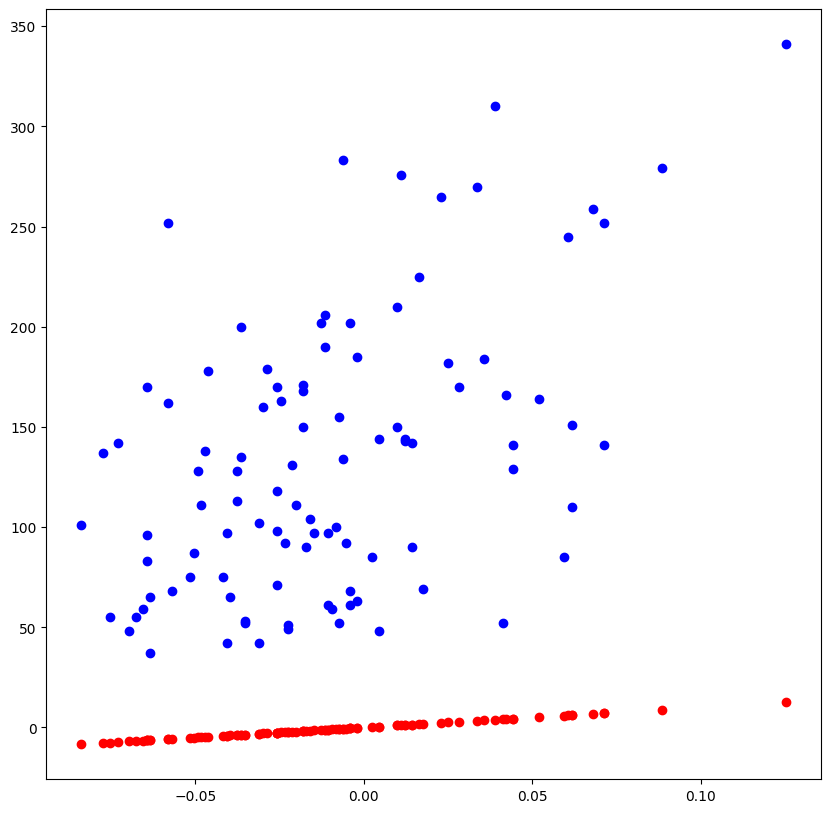

In [7]:
predictions = linreg.predict()

plot_lin(X,y,predictions)

In [8]:
mean_squared_error(y, predictions)

22593.50747804595

In [9]:
mse = []
for i in range(0,250):
    linreg.update_b(i)
    predicted = linreg.predict()
    mse.append(mean_squared_error(y,predicted))

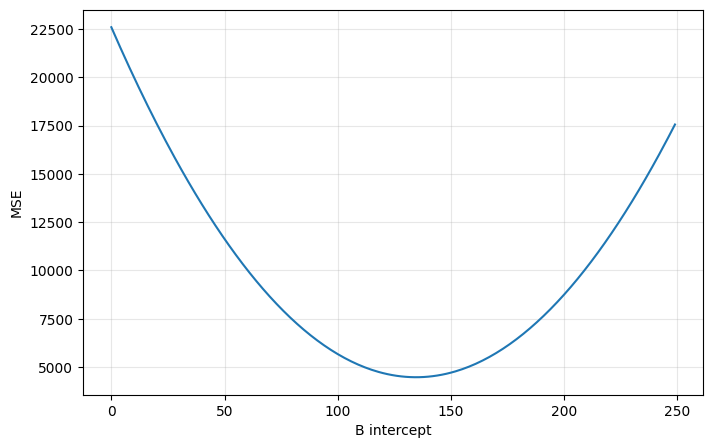

In [10]:
fig,ax = plt.subplots(1,1,figsize=(8,5))
ax.plot(mse)
ax.set_ylabel('MSE')
ax.set_xlabel('B intercept')
ax.grid(alpha=0.3)
plt.show()

In [29]:
# linreg.intercept_mse_derivative(134.5456)
linreg.intercept_mse_derivative(134.6139)

0.004826543842227693

In [35]:
b = 0
lr = 0.001
for i in range(100):
    step = linreg.intercept_mse_derivative(b)
    # use slope to compute new intercept using a step towards slope eq 0
    # learning rate determines the effect of step
    new_b = b-step*lr
    print("{0:<10} {1:<15} {2}".format(round(b,4), round(step,4), linreg.mse(b)))
    b = new_b

0          -26922.7752     22593.50747804595
26.9228    -21538.2201     16069.985070681749
48.461     -17230.5761     11894.930729968655
65.6916    -13784.4609     9222.895951912276
79.476     -11027.5687     7512.793693956195
90.5036    -8822.055       6418.328248864302
99.3257    -7057.644       5717.870364005491
106.3833   -5646.1152      5269.57731769585
112.0294   -4516.8921      4982.669768057682
116.5463   -3613.5137      4799.048936289253
120.1598   -2890.811       4681.531603957459
123.0506   -2312.6488      4606.32051126511
125.3633   -1850.119       4558.185411942008
127.2134   -1480.0952      4527.3789483752225
128.6935   -1184.0762      4507.662811692479
129.8776   -947.2609       4495.044484215524
130.8248   -757.8088       4486.968754630272
131.5826   -606.247        4481.800287695712
132.1889   -484.9976       4478.492468857592
132.6739   -387.9981       4476.375464801196
133.0619   -310.3985       4475.020582205104
133.3723   -248.3188       4474.153457343604
133.6206 

# Optimize b and m

In [36]:
class LinReg():
    """ Example to estimate the intecept b and slope m
    """
    def __init__(self, m, b, x, y):
        """ Initialize line parameters and store data
        """
        self.m = m
        self.b = b
        self.x = x
        self.y = y
    
    def set_b(self, b):
        """ Set intecept value
        """
        self.b = b

    def set_m(self, m):
        """ Set slope value
        """
        self.m = m
        
    def predict(self):
        """ Get predictions based on current model parameters m, b
        """
        return self.b + self.m*self.x 
        
    def intercept_mse_derivative(self, b):
        """ Compute the derivative of the loss fuction (mse)
            at intercept b
        """
        return sum(-2*(self.y-(b+self.m*self.x)))
    
    def slope_intercept_mse_derivative(self,m,b):
        """ Compute the derivative of the loss fuction (mse)
            at slope m and intercept b
        """
        d_intercept = sum(-2*(self.y-(b+m*self.x)))
        d_slope = sum(-2*self.x*((self.y-(b+m*self.x))**2))
        return d_slope, d_intercept
    
    def mse(self,m,b):
        """ Compute the mse
            at intercept b
        """
        return mean_squared_error(self.y, b+m*self.x)
    
linreg = LinReg(100,0,X,y)

In [37]:
# set initial values of slope and intercept
b = 0
m = 1


lr = 0.001
step_b = 100
step_m = 100

m_gd = []
b_gd = []
mse_gd = []

while abs(step_m) > 0.1:
    step_m, step_b = linreg.slope_intercept_mse_derivative(m,b)
    # use slope to compute new intercept using a step towards slope eq 0
    # learning rate determines the effect of step
    new_b = b-step_b*lr
    new_m = m-step_m*lr
    
    mse = linreg.mse(m,b)
    m_gd.append(m)
    b_gd.append(b)
    mse_gd.append(mse)
    
    print("{0:<10} {1:<15} {2}".format(round(m,4), round(b,4), mse))
    b = new_b
    m = new_m

1          0               22574.967248821704
50.5259    26.7141         16129.152760699151
94.1498    48.1898         11945.601436309673
131.9387   65.4623         9223.99812426564
164.4294   79.3599         7448.863081285747
192.3136   90.5465         6287.447212118779
216.291    99.5546         5524.597854522451
237.0054   106.8115        5021.006475453615
255.0211   112.6608        4686.359510742906
270.8185   117.3781        4462.034840589747
284.7993   121.1853        4309.93222498923
297.2951   124.2605        4205.25424819242
308.5777   126.7471        4131.835694767521
318.8679   128.7601        4079.118933251178
328.3448   130.3921        4040.193501213885
337.1531   131.7178        4010.5243197099107
345.409    132.7969        3987.1258553714856
353.2062   133.6775        3968.0252899253574
360.62     134.3985        3951.9131332542165
367.7108   134.9909        3937.9155097665534
374.527    135.4798        3925.4454993700165
381.1076   135.8852        3914.105897805414
387.

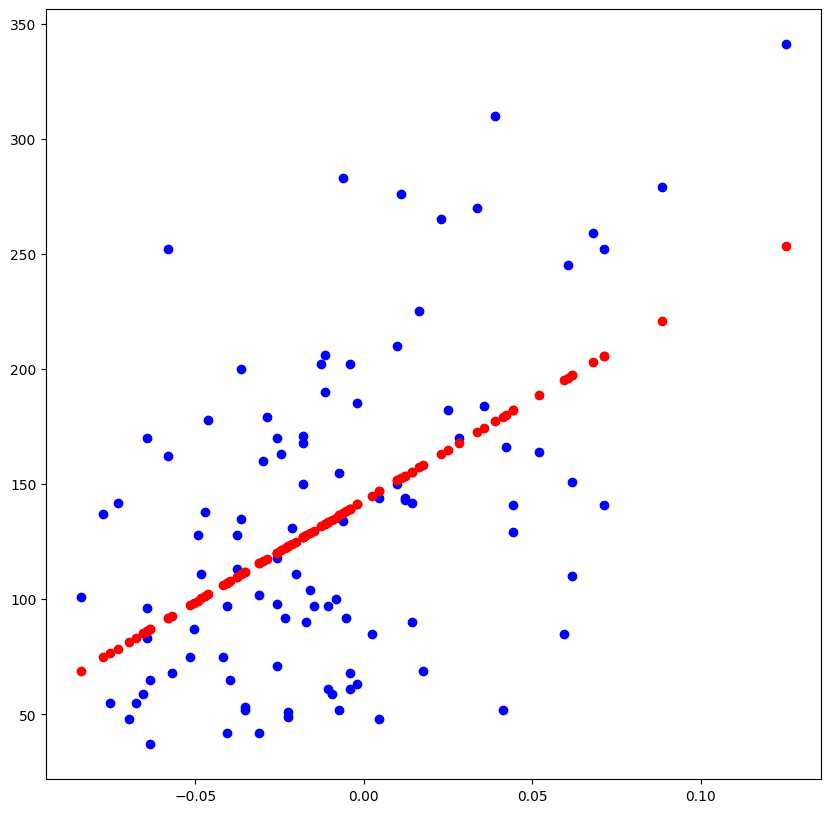

In [38]:
# set new slope and intercept found by gradient descent
linreg.set_m(881.2001)
linreg.set_b(142.8467)

predictions = linreg.predict()
plot_lin(X,y,predictions)

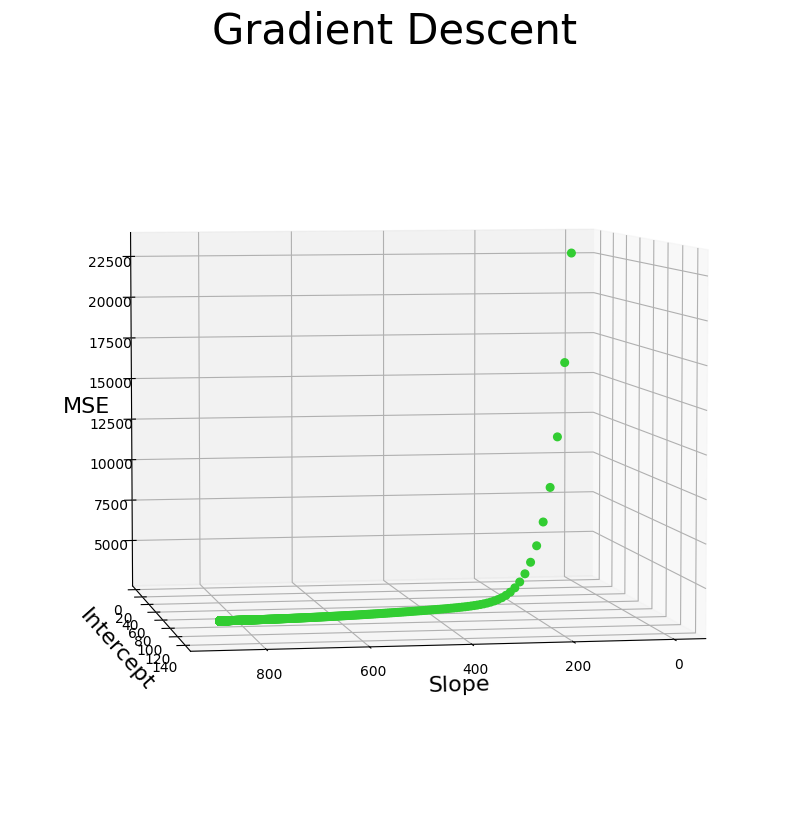

In [39]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np



        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=5, azim=80)
xs = m_gd
ys = b_gd
zs = mse_gd
ax.scatter(xs, ys, zs, marker='o',s=30,c='limegreen',alpha=1)

ax.set_xlabel('Slope',fontsize=16)
ax.set_ylabel('Intercept',fontsize=16)
ax.set_zlabel('MSE',fontsize=16)
ax.set_title('Gradient Descent',fontsize=30)
plt.show()

In [40]:
len(m_gd)

1179

# Stochastic Gradient Descent (SGD)
Uses random samples at every step to reduce number of calculations

In [41]:
class LinReg():
    """ Example to estimate the intecept b
    """
    def __init__(self,m,b,x,y):
        self.m = m
        self.b = b
        self.x = x
        self.y = y
    
    def set_b(self, b):
        """ Set intecept value
        """
        self.b = b

    def set_m(self, m):
        """ Set slope value
        """
        self.m = m
        
    def predict(self):
        """ Get predictions based on current model parameters m, b
        """
        return self.b + self.m*self.x 
        
    def intercept_mse_derivative(self, b):
        """ Compute the derivative of the loss fuction (mse)
            at intercept b
        """
        return sum(-2*(self.y-(b+self.m*self.x)))
    
    def slope_intercept_mse_derivative(self,m,b):
        """ Compute the derivative of the loss fuction (mse)
            at intercept b
        """
        d_intercept = sum(-2*(self.y-(b+m*self.x)))
        d_slope = sum(-2*self.x*((self.y-(b+m*self.x))**2))
        return d_slope, d_intercept
    
    
    def stochastic_slope_intercept_mse_derivative(self,m,b):
        """ Compute the derivative of the loss fuction (mse) of
            slope and intercept using a random sample.
        """
        n_samples = 20
        from numpy.random import default_rng

        rng = default_rng()
        random_index = rng.choice(self.x.shape[0], size=n_samples, replace=False)
        x = self.x[random_index]
        y = self.y[random_index]
        
        d_intercept = sum(-2*(y-(b+m*x)))
        d_slope = sum(-2*x*((y-(b+m*x))**2))
        return d_slope, d_intercept
    
    def mse(self,m,b):
        """ Compute the mse
            at intercept b
        """
        return mean_squared_error(self.y, b+m*self.x)
    
linreg = LinReg(100,0,X,y)

In [50]:
b = 0
m = 1
lr = 0.001
step_b = 100
step_m = 100
m_sgd = []
b_sgd = []
mse_sgd = []

while abs(step_m) > 0.1:
    step_m, step_b = linreg.stochastic_slope_intercept_mse_derivative(m,b)
    # use slope to compute new intercept using a step towards slope eq 0
    # learning rate determines the effect of step
    new_b = b-step_b*lr
    new_m = m-step_m*lr
    mse = linreg.mse(m,b)
    m_sgd.append(m)
    b_sgd.append(b)
    mse_sgd.append(mse)
    
    print("{0:<10} {1:<15} {2}".format(round(m,4), round(b,4), mse))
    b = new_b
    m = new_m

1          0               22574.967248821704
-0.0845    4.7566          21327.00482428024
6.4783     10.6823         19834.258869121943
2.9403     14.8787         18821.039336526115
4.5095     19.3569         17777.266943123155
0.9218     23.8361         16775.558235014116
14.6367    29.0131         15658.265574672325
4.5626     32.2939         14988.467537284077
21.548     36.9215         14059.86480616007
25.3216    41.0279         13278.266956828598
32.0735    45.4385         12473.395895229596
48.6036    48.5968         11910.16338863821
52.1934    51.5599         11409.173538051551
64.3189    54.8708         10862.0868608766
59.6639    57.9851         10382.068966294073
57.3744    60.4426         10015.987623548026
65.2446    63.3909         9581.233363784773
64.7963    67.0049         9082.667901486391
72.4931    70.0645         8671.167858566165
81.3398    73.1409         8274.11031263435
90.187     75.8993         7932.296498884567
87.2773    77.743          7723.394338660702


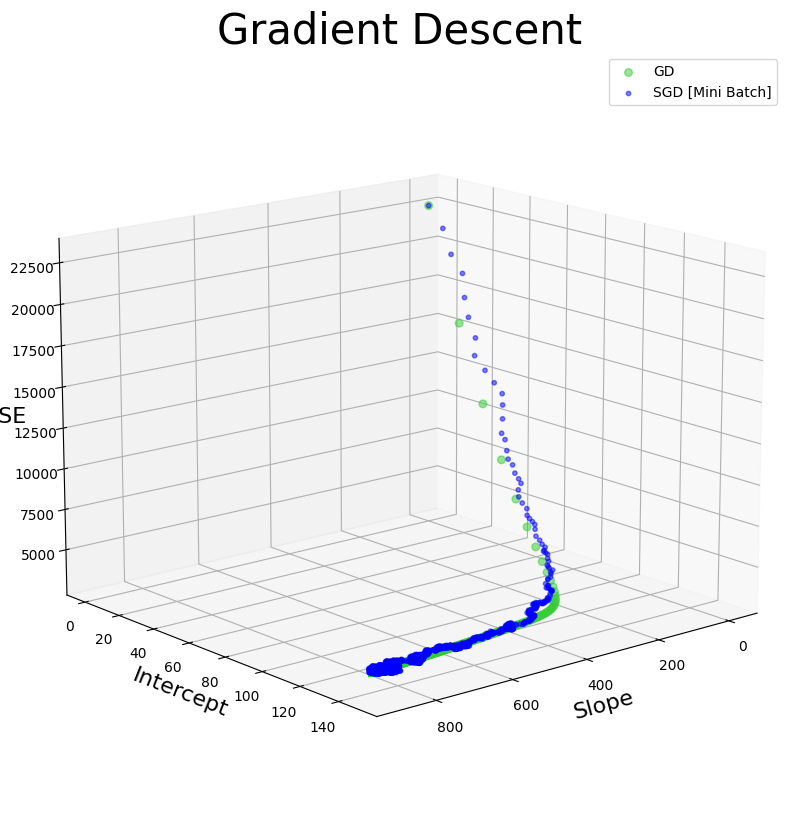

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=50)

ax.scatter(m_gd, b_gd, mse_gd, marker='o',s=30,c='limegreen',alpha=0.5,label='GD')
ax.scatter(m_sgd, b_sgd, mse_sgd, marker='o',s=10,c='blue',alpha=0.5,label='SGD [Mini Batch]')
ax.legend()
ax.set_xlabel('Slope',fontsize=16)
ax.set_ylabel('Intercept',fontsize=16)
ax.set_zlabel('MSE',fontsize=16)
ax.set_title('Gradient Descent',fontsize=30)
plt.show()

In [44]:
lin = linear_model.LinearRegression()
lin.fit(X.reshape(-1, 1),y)

LinearRegression()

In [46]:
lin.coef_, lin.intercept_

(array([831.65700359]), 142.3246324594354)

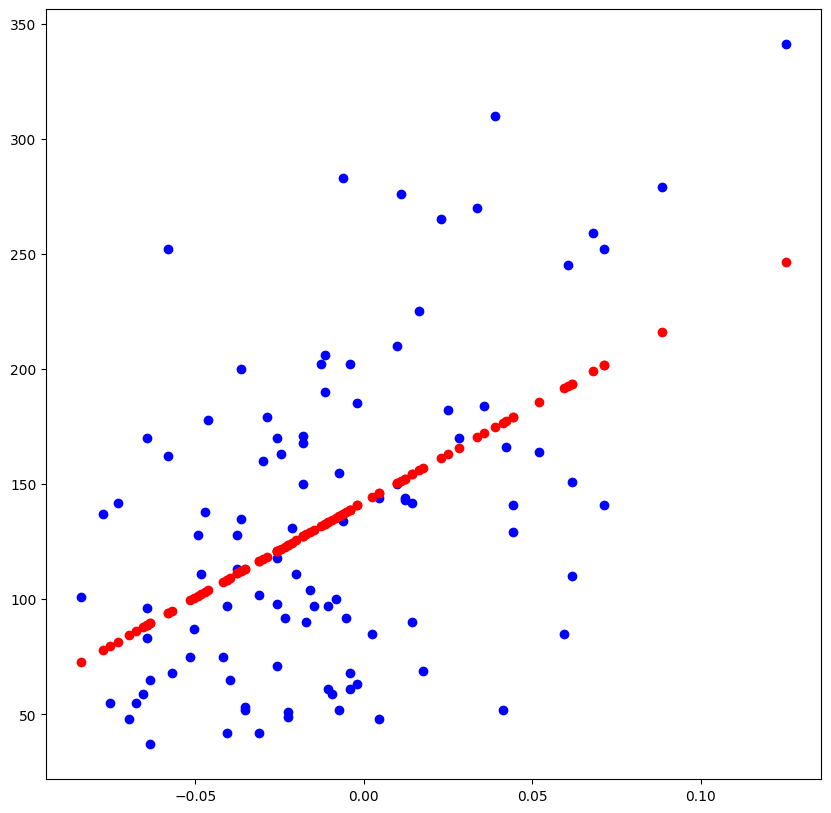

In [47]:
predictions_lin = lin.predict(X.reshape(-1, 1))
plot_lin(X, y,predictions_lin)